In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
%run own_and_modified_functions.ipynb

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
# Import the anndata objects
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
anndata_objects = []
anndataA11 = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11.h5ad')
anndataA12 = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12.h5ad')
anndataC2 = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2.h5ad') 
anndataD21 = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21.h5ad')
anndata_objects.append(anndataA11)
anndata_objects.append(anndataA12)
anndata_objects.append(anndataC2)
anndata_objects.append(anndataD21)

In [3]:
genes1 = anndataA11.var_names.to_list()
genes2 = anndataA12.var_names.to_list()
genes3 = anndataC2.var_names.to_list()
genes4 = anndataD21.var_names.to_list()
genes = list(set(genes1 + genes2 + genes3 + genes4))
# write genes to file
with open(OUTPUT_DIR + '/' + 'genes.txt', 'w') as f:
    for item in genes:
        f.write("%s\n" % item)

In [4]:
genes

['Adgre1',
 'Spp1',
 'Cyp2e1',
 'Stab2',
 'Mmrn1',
 'Tmem119',
 'Chil3',
 'Nrxn1',
 'Mfap4',
 'Siglech',
 'Ccr7',
 'Lpl',
 'Fcgr1',
 'Cd14',
 'Gdf15',
 'Igfbp3',
 'Hgf',
 'Lyve1',
 'Svep1',
 'Sirpa',
 'Acta2',
 'Cxcl12',
 'Cd3e',
 'Ccr2',
 'Cd207',
 'Glul',
 'Gja5',
 'Gpnmb',
 'Reln',
 'Fn1',
 'Rspo3',
 'Pdgfra',
 'Prox1',
 'Clec4f',
 'Timd4',
 'Myh11',
 'Plpp1',
 'Col1a1',
 'Clic5',
 'Dcn',
 'Ms4a7',
 'Colec11',
 'Flt4',
 'Lhx6',
 'Pecam1',
 'Krt19',
 'Cox6a2',
 'Cd79a',
 'Sds',
 'Epcam',
 'Des',
 'Axl',
 'Spn',
 'Itgax',
 'Spon2',
 'Wnt2',
 'Ngfr',
 'Slc40a1',
 'Wt1',
 'Lilra5',
 'Itgae',
 'Mgl2',
 'Sox9',
 'Vwf',
 'C5ar1',
 'Ghr',
 'F13a1',
 'Olfml3',
 'Clec9a',
 'Hal',
 'Cx3cr1',
 'Cd209a',
 'Pdgfrb',
 'Cd5l',
 'Cd19',
 'Grip1',
 'Adgrg6',
 'Atp6v0d2',
 'Gls2',
 'Folr2',
 'Sept3',
 'Xcr1',
 'Trem2',
 'Mafb',
 'Cd36',
 'Upk3b',
 'Marco',
 'Msln',
 'Wnt9b',
 'Adamtsl2',
 'Itgb7',
 'Cd9',
 'Mmp12',
 'Dpt',
 'Flt3',
 'Vsig4',
 'Lgr5',
 'Pck1',
 'Ncam1',
 'Clec10a']

Hepa            10
LSEC            11
Portal vein      5
Central vein     7
Chol             7
Kupf            16
Stel            16
Fibr            21
B cell           4
Meso             5
Portal LAM      12
Oth im           4
dtype: int64


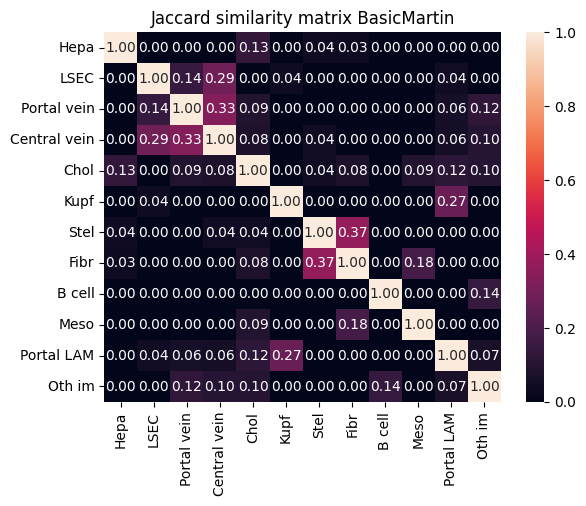

In [5]:
# make basic (0 or 1) Martin marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListMartinNoLow.csv"
marker_genes_all = pd.read_csv(path_mg, sep=',', index_col=0)
genes_all = marker_genes_all.index.tolist()
genes_overlap = list(set(genes) & set(genes_all))
marker_genes = marker_genes_all.loc[genes_overlap,:]
marker_genes_basic = pd.DataFrame()
marker_genes_basic['Hepa'] = marker_genes['Hepatocytes'] + marker_genes['HepatocytesPortal'] + marker_genes['HepatocytesCentral']
marker_genes_basic['LSEC'] = marker_genes['LSEC45'] + marker_genes['LSEC Portal'] + marker_genes['LSEC Central']
marker_genes_basic['Portal vein'] = marker_genes['portal_vein_EC45'] 
marker_genes_basic['Central vein'] = marker_genes['central_vein_EC45']
marker_genes_basic['Chol'] = marker_genes['Cholangiocytes']  
marker_genes_basic['Kupf'] = marker_genes['Kupffer cells']
marker_genes_basic['Stel'] = marker_genes['stellateAll'] + marker_genes['stellate PeriPortal'] + marker_genes['stellate PeriCentral'] 
marker_genes_basic['Fibr'] = marker_genes['FibroblastAll'] + marker_genes['fibroblastPortal'] + marker_genes['FibroblastsCentral'] + marker_genes['capsular_fibroblasts45']
marker_genes_basic['B cell'] = marker_genes['B cells']
marker_genes_basic['Meso'] = marker_genes['Mesothelial cells']  
marker_genes_basic['Portal LAM'] = marker_genes['Portal LAM macrophages']
marker_genes_basic['Oth im'] = 0
oth_im_genes = ['Cd9','Itgb7','Spn','Itgax']
marker_genes_basic.loc[oth_im_genes,'Oth im'] = 1
# if value in marker_genes_basic is > 1, set to 1
marker_genes_basic[marker_genes_basic > 1] = 1
# save to csv
marker_genes_basic.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv")
nr_markers_BasicMartin = Jaccard_similarity_matrix("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv",'BasicMartin')

Hepa             7.667
LSEC             8.667
Portal vein      6.000
Central vein     8.500
Chol             7.500
Kupf            19.500
Stel            15.000
Fibr            17.625
B cell           4.500
Meso             6.000
Portal LAM      13.500
Oth im           4.000
dtype: float64


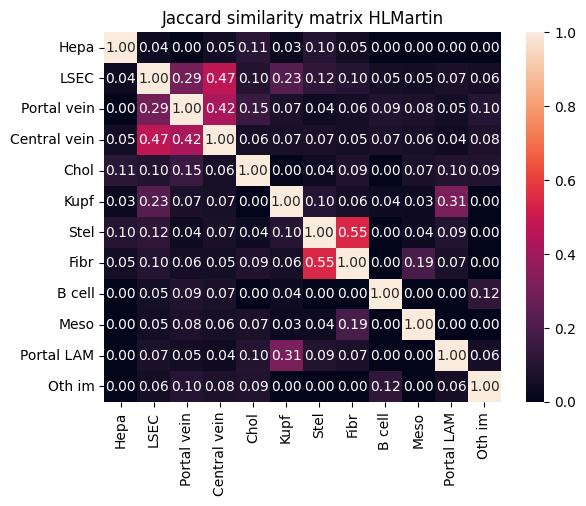

In [6]:
# make high_low (0, 0.5, 1) Martin marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/MarkerGenesResolve_Martin.xlsx"
marker_genes_hl_all = pd.read_excel(path_mg, sheet_name='markerGenesResolveMC Martin', index_col=0)
genes_hl_all = marker_genes_hl_all.index.tolist()
genes_hl_overlap = list(set(genes) & set(genes_hl_all))
marker_genes_hl = marker_genes_hl_all.loc[genes_hl_overlap,:]
marker_genes_hl = marker_genes_hl.fillna(0)
marker_genes_hl = marker_genes_hl.replace('Hi', 1)
marker_genes_hl = marker_genes_hl.replace('HI', 1)
marker_genes_hl = marker_genes_hl.replace('Zonated', 0)
marker_genes_hl = marker_genes_hl.replace('zonated', 0)
marker_genes_hl = marker_genes_hl.replace('Low', 0.5)
marker_genes_hl = marker_genes_hl.replace('low', 0.5)
marker_genes_hl = marker_genes_hl.replace('Mid', 0.5)
marker_genes_hl = marker_genes_hl.replace('O', 0)
#print(marker_genes_hl.stack().value_counts())
marker_genes_HL = pd.DataFrame()
marker_genes_HL['Hepa'] = (marker_genes_hl['Hepatocytes'] + marker_genes_hl['HepatocytesPortal'] + marker_genes_hl['HepatocytesCentral'])/3
marker_genes_HL['LSEC'] = (marker_genes_hl['LSEC45'] + marker_genes_hl['LSEC Portal'] + marker_genes_hl['LSEC Central'])/3
marker_genes_HL['Portal vein'] = marker_genes_hl['portal_vein_EC45']
marker_genes_HL['Central vein'] = marker_genes_hl['central_vein_EC45'] 
marker_genes_HL['Chol'] = marker_genes_hl['Cholangiocytes']  
marker_genes_HL['Kupf'] = marker_genes_hl['Kupffer cells']
marker_genes_HL['Stel'] = (marker_genes_hl['stellateAll'] + marker_genes_hl['stellate PeriPortal'] + marker_genes_hl['stellate PeriCentral'])/3 
marker_genes_HL['Fibr'] = (marker_genes_hl['FibroblastAll'] + marker_genes_hl['fibroblastPortal'] + marker_genes_hl['FibroblastsCentral'] + marker_genes_hl['capsular_fibroblasts45'])/4
marker_genes_HL['B cell'] = marker_genes_hl['B cells']
marker_genes_HL['Meso'] = marker_genes_hl['Mesothelial cells']  
marker_genes_HL['Portal LAM'] = marker_genes_hl['Portal LAM macrophages']
marker_genes_HL['Oth im'] = 0
oth_im_genes = ['Cd9','Itgb7','Spn','Itgax']
marker_genes_HL.loc[oth_im_genes,'Oth im'] = 1
marker_genes_HL = marker_genes_HL.round(3)
#print(marker_genes_HL.stack().value_counts())
marker_genes_HL.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/HLMartin.csv")
nr_markers_HLMartin = Jaccard_similarity_matrix("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/HLMartin.csv",'HLMartin')

48
Hepa            1.0
LSEC            4.0
Portal vein     1.0
Chol            2.0
Kupf           12.0
Stel            5.0
Fibr            4.0
B cell          2.0
Meso            1.0
Portal LAM      3.0
Oth im          4.0
dtype: float64


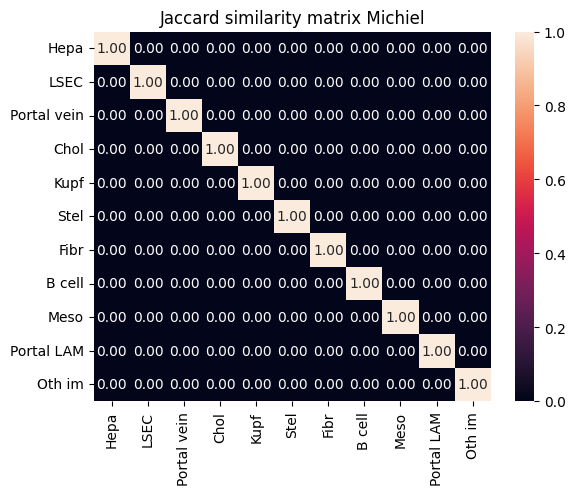

In [7]:
# create marker gene list based on updated Sparrow marker panel by Michiel
mapping_cell_type_names = {}
mapping_cell_type_names['Hepa'] = 'Hepatocyte'
mapping_cell_type_names['LSEC'] = 'LSEC'
mapping_cell_type_names['Portal vein'] = 'PV EC'
mapping_cell_type_names['Central vein'] = 'CV EC'
mapping_cell_type_names['Chol'] = 'Cholangiocyte'
mapping_cell_type_names['Kupf'] = 'KC'
mapping_cell_type_names['Stel'] = 'Stellate cell'
mapping_cell_type_names['Fibr'] = 'Fibroblast'
mapping_cell_type_names['B cell'] = 'B cell'
mapping_cell_type_names['Meso'] = 'Mesothelial cell'
mapping_cell_type_names['Portal LAM'] = 'BD LAM'
path = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/updated_SPArrOW_marker_panel_Michiel.csv"
df_Michiel_raw = pd.read_csv(path, sep=',', index_col=0)
# only keep the first 415 rows (rest are zonation genes)
df_Michiel = df_Michiel_raw.iloc[:414,:]
genes_Michiel = df_Michiel.index.tolist()
genes_overlap_Michiel = list(set(genes) & set(genes_Michiel))
print(len(genes_overlap_Michiel))
df_Michiel_subset = df_Michiel.loc[genes_overlap_Michiel,:]
# add column HepatocyteCentral and HepatocytePortal to Hepatocyte column
df_Michiel_subset['Hepatocyte'] = df_Michiel_subset['Hepatocyte'] + df_Michiel_subset['HepatocyteCentral'] + df_Michiel_subset['HepatocytePortal']
df_Michiel_subset[df_Michiel_subset['Hepatocyte'] > 1] = 1
# rename column 
for key in mapping_cell_type_names:
    df_Michiel_subset = df_Michiel_subset.rename(columns={mapping_cell_type_names[key]:key})
df_Michiel_subset['Oth im'] = 0
oth_im_genes = ['Cd9','Itgb7','Spn','Itgax']
# add empty rows for other immune cells
for gene in oth_im_genes:
    df_Michiel_subset.loc[len(df_Michiel_subset)] = 0
    df_Michiel_subset = df_Michiel_subset.rename(index={len(df_Michiel_subset)-1: gene})
df_Michiel_subset.loc[oth_im_genes,'Oth im'] = 1
cell_types = list(mapping_cell_type_names.keys())
cell_types.append('Oth im')
df_Michiel_subset = df_Michiel_subset[cell_types]
# drop column 'Central vein' because no markers are present
df_Michiel_subset = df_Michiel_subset.drop(columns=['Central vein'])
df_Michiel_subset.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/Michiel.csv")
nr_markers_Michiel = Jaccard_similarity_matrix("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/Michiel.csv",'Michiel')
# drop column 'Meso' for A12 because the only marker 'Grip1' is missing in A12
df_Michiel_subsetA12 = df_Michiel_subset.drop(columns=['Meso'])
df_Michiel_subsetA12.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/MichielA12.csv")

In [8]:
def add_DEGs_to_dict(dictionary, cell_type, sheet_name, path_mg):
    markers = pd.read_excel(path_mg, sheet_name=sheet_name, index_col=0)
    markers = markers.index.to_list() 
    for gene in markers:
        if gene not in dictionary[cell_type]:
            dictionary[cell_type].append(gene)

In [9]:
# create marker gene list based on DEGs Atlas
cell_types = ['Hepa','LSEC','Portal vein','Central vein','Chol','Kupf','Stel','Fibr','B cell','Meso','Portal LAM','Oth im']
atlas_ct_DEGs = {}
for cell_type in cell_types:
    atlas_ct_DEGs[cell_type] = []
# liver_atlas_all
add_DEGs_to_dict(atlas_ct_DEGs, 'Portal vein', 'Endothelial', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/liver_atlas_all_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Central vein', 'Endothelial', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/liver_atlas_all_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'LSEC', 'Endothelial', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/liver_atlas_all_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Fibr', 'Fibroblast', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/liver_atlas_all_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Hepa', 'Hepatocyte', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/liver_atlas_all_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Chol', 'Cholangiocyte', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/liver_atlas_all_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Kupf', 'KC', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/liver_atlas_all_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'B cell', 'B cell', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/liver_atlas_all_top20_specific_marker_selection.xlsx")
# CD45-
add_DEGs_to_dict(atlas_ct_DEGs, 'Hepa', 'Hepatocyte snRNA', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Hepa', 'Hepatocyte scRNA', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Chol', 'Cholangiocyte', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Stel', 'Stellate cell', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Fibr', 'Fibroblast', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Meso', 'Mesothelial cell', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Fibr', 'Capsule Fibroblast', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'LSEC', 'LSEC', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Central vein', 'CV EC', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Portal vein', 'PV EC', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/CD45neg_cells_top20_specific_marker_selection.xlsx")
# lymphoid
add_DEGs_to_dict(atlas_ct_DEGs, 'B cell', 'B cell', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/lymphoid_cells_top20_specific_marker_selection.xlsx")
# myeloid
add_DEGs_to_dict(atlas_ct_DEGs, 'Kupf', 'KC', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/myeloid_cells_top20_specific_marker_selection.xlsx")
add_DEGs_to_dict(atlas_ct_DEGs, 'Portal LAM', 'BD LAM', "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/myeloid_cells_top20_specific_marker_selection.xlsx")

In [ ]:
# stromal --> replaced by markerGenesFibroRanked
df_fibro_ranked = pd.read_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/top20_specific_markers_LCA/markerGenesFibroRanked.csv", sep=',', index_col=0)
fibro_ranked_genes = df_fibro_ranked.index.to_list()
fibro_ranked_genes_overlap = list(set(genes) & set(fibro_ranked_genes))
df_fibro_ranked_subset = df_fibro_ranked.loc[fibro_ranked_genes_overlap,:]
df_fibro_ranked_subset
# replace all 2042.0 with 0
df_fibro_ranked_subset = df_fibro_ranked_subset.replace(2042.0, 0)
# drop columns
df_fibro_ranked_subset = df_fibro_ranked_subset.drop(columns=['Tot_Rank_VSMCs'])
column_cell_type = ['Stel','Fibr','Fibr','Fibr','Meso']
c = 0
for column in df_fibro_ranked_subset.columns:
    df_fibro_ranked_column = df_fibro_ranked_subset[column]
    df_fibro_ranked_column = df_fibro_ranked_column.sort_values(ascending=False) 
    df_fibro_ranked_column = df_fibro_ranked_column.iloc[:20]
    for index, value in df_fibro_ranked_column.items():
        if value > 0:
            if index not in atlas_ct_DEGs[column_cell_type[c]]:
                atlas_ct_DEGs[column_cell_type[c]].append(index)
    c = c + 1

Hepa             1
LSEC             4
Portal vein      5
Central vein     6
Chol             3
Kupf             7
Stel             3
Fibr            11
B cell           2
Meso             9
Portal LAM       6
Oth im           4
dtype: int64


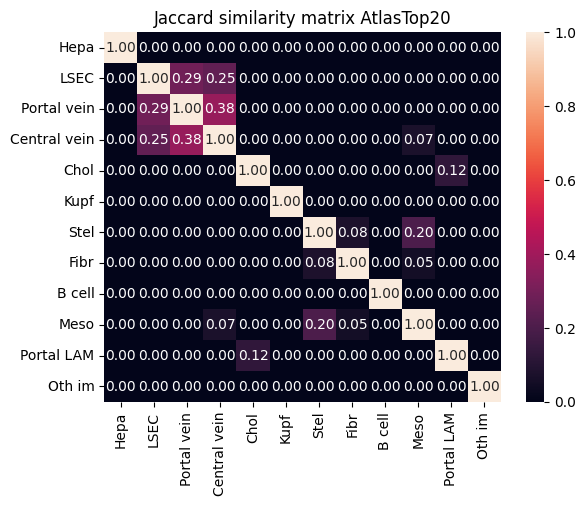

In [11]:
# manually add other immune cell markers
oth_im_genes = ['Cd9','Itgb7','Spn','Itgax']
for gene in oth_im_genes:
    atlas_ct_DEGs['Oth im'].append(gene)
# get all unique values in dictionary
unique_values = []
for key in atlas_ct_DEGs:
    for value in atlas_ct_DEGs[key]:
        if value not in unique_values:
            unique_values.append(value)
genes_overlap_Atlas = list(set(genes) & set(unique_values))
# create dataframe with rows = unique_values, columns = cell types
df_atlas_ct_DEGs = pd.DataFrame(index=genes_overlap_Atlas, columns=cell_types)
# change NaN to 0
df_atlas_ct_DEGs = df_atlas_ct_DEGs.fillna(0)
for key in atlas_ct_DEGs:
    key_overlap_genes = list(set(atlas_ct_DEGs[key]) & set(genes_overlap_Atlas))
    df_atlas_ct_DEGs.loc[key_overlap_genes,key] = 1
df_atlas_ct_DEGs.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasTop20.csv")
nr_markers_AtlasTop20_temp = Jaccard_similarity_matrix("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasTop20.csv",'AtlasTop20')

In [13]:
nr_markers = [nr_markers_BasicMartin, nr_markers_HLMartin, nr_markers_Michiel, nr_markers_AtlasTop20_temp]
names = ['BasicMartin','HLMartin','Michiel','AtlasTop20']
cell_types = ['Hepa','LSEC','Portal vein','Central vein','Chol','Kupf','Stel','Fibr','B cell','Meso','Portal LAM','Oth im']
df_nr_markers = pd.DataFrame(index=names, columns=cell_types)
for i in range(len(nr_markers)):
    for ct in nr_markers[i].index.tolist():
        df_nr_markers[ct][names[i]] = nr_markers[i][ct]
df_nr_markers = df_nr_markers.fillna(0)
df_nr_markers = df_nr_markers.round(1)
df_nr_markers

,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM,Oth im
BasicMartin,10.0,11.0,5.0,7.0,7.0,16.0,16.0,21.0,4.0,5.0,12.0,4.0
HLMartin,7.7,8.7,6.0,8.5,7.5,19.5,15.0,17.6,4.5,6.0,13.5,4.0
Michiel,1.0,4.0,1.0,0.0,2.0,12.0,5.0,4.0,2.0,1.0,3.0,4.0
AtlasTop20,1.0,4.0,5.0,6.0,3.0,7.0,3.0,11.0,2.0,9.0,6.0,4.0


In [ ]:
ad_sc = sc.read('/home/wout/Documents/Thesis_lokaal/Data_to_create_liver_atlas/adataAtlasRESOLVE.h5ad')
ad_sc=ad_sc[ad_sc.obs.typeSample=='nucSeq']


In [16]:
ad_sc

View of AnnData object with n_obs × n_vars = 18666 × 31053
    obs: 'annot', 'typeSample', 'cluster_orig', 'annotation_CD45Neg', 'annotation_Fibro', 'annotation'
    uns: 'annot_colors'
    obsm: 'X_umap'

In [17]:
np.unique(ad_sc.obs['annotation'])

array(['B cells', 'Cholangiocytes', 'Endothelial cells', 'Hepatocytes',
       'HsPCs', 'Kupffer cells', 'LECs', 'LSECs', 'Mesothelial cells',
       'Other_ImmuneCells', 'VSMC', 'central_vein_EC45', 'fibroblast',
       'portal_vein_EC45', 'stellate'], dtype=object)

In [18]:
# substitute values in ad_sc.obs['annot'] 
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['stellate'], 'Stel')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['central_vein_EC45','portal_vein_EC45','Endothelial cells'], 'Endo vein')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['fibroblast'], 'Fibr')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Mesothelial cells'], 'Meso')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Cholangiocytes'], 'Chol')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Hepatocytes'], 'Hepa')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['Kupffer cells'], 'Kupf')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['B cells'], 'B cell')
ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['LSECs'], 'LSEC')

np.unique(ad_sc.obs['annotation'])

/tmp/ipykernel_17062/3583617197.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad_sc.obs['annotation'] = ad_sc.obs['annotation'].replace(['stellate'], 'Stel')


array(['B cell', 'Chol', 'Endo vein', 'Fibr', 'Hepa', 'HsPCs', 'Kupf',
       'LECs', 'LSEC', 'Meso', 'Other_ImmuneCells', 'Stel', 'VSMC'],
      dtype=object)

In [19]:
# calculate proportions of each value in column 'annotation' in ad_sc
ad_sc.obs['annotation'].value_counts(normalize=True)

Hepa                 0.579985
Stel                 0.137683
LSEC                 0.092414
Kupf                 0.032037
Endo vein            0.031662
Fibr                 0.030430
Meso                 0.027965
Chol                 0.026733
HsPCs                0.022126
Other_ImmuneCells    0.008250
B cell               0.006215
VSMC                 0.003268
LECs                 0.001232
Name: annotation, dtype: float64

In [20]:
# to dataframe
df_atlas = pd.DataFrame(ad_sc.obs['annotation'].value_counts(normalize=True))
# only select the rows with index in list
df_atlas = df_atlas.loc[marker_genes_basic.columns]
df_atlas.sort_index(inplace=True)
df_atlas

,annotation
B cell,0.006215
Chol,0.026733
Hepa,0.579985
Kupf,0.032037
LSEC,0.092414
Meso,0.027965
Endo vein,0.031662
Fibr,0.030430
Stel,0.137683


In [21]:
# change name of column 
df_atlas.columns = ['atlas']
# write to csv
df_atlas.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/basic_annotation_percentage_atlas.csv")